In [1]:
# Using a Hough transform to locate the ball in a given image
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os,math

In [132]:
DIR_PATH = '../nba-3d-data/harden/view_0/'
IMAGE_PATH = '../nba-3d-data/harden/view_0_alphapose/vis/frame_00008.png'

# ground truths

rgb = [(120,76,53),(139,73,56),(122,73,46),(126,84,53),(150,86,71),(128,81,62),(113,68,51),(151,100,81),(103,66,50)]
# red = [120,
# green = 76
# blue = 53



# BLUE = (blue-blue*offset,blue+blue*offset)
# GREEN = (green-green*offset,green+green*offset)
# RED = (red-red*offset,red+red*offset)

In [133]:
for root, dirs, files in os.walk(DIR_PATH):
    files.sort()

In [134]:
def _ground_truth_distance(mean, thresh):
    _,b,g,r = mean
    red,green,blue = thresh
    return math.sqrt((blue-b)**2 + (green-g)**2 + (red-r)**2)
    

In [135]:
def ground_truth_distance(mean):
    return sum([_ground_truth_distance(mean,val) for val in rgb])/len(rgb)

In [136]:
def get_mean_color(height,width,circle_coord,true_img):
    circle_mask = np.zeros((height,width),np.uint8)
    cv.circle(circle_mask,(circle_coord[0],circle_coord[1]),circle_coord[2],1,-1)
    return cv.mean(true_img, mask=circle_mask)[::-1]
    

changed circle_coord:  [580, 244, 10]
changed min_dist:  18.487358158224502


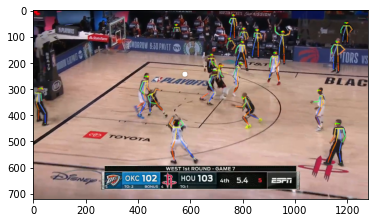

In [137]:
def find_closest_match(all_circles,imgpath):
    bgr_img = cv.imread(imgpath,1)
    true_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
    height,width,depth=true_img.shape 
    
    min_dist = float('inf')
    closest_circle = None
    
    for circle_coord in all_circles:
        bgr_mean = get_mean_color(height,width,circle_coord,true_img)
        dist = ground_truth_distance(bgr_mean)
        if dist < min_dist: 
            closest_circle = circle_coord
            min_dist = dist
            print('changed circle_coord: ',circle_coord)
            print('changed min_dist: ', min_dist)
        
    return closest_circle

ball = find_closest_match([[580,244,10]],IMAGE_PATH)
bgr_img = cv.imread(IMAGE_PATH,1)
image = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
cv.circle(image,(ball[0],ball[1]),ball[2],(255,255,255),-1)
plt.imshow(image)
plt.show()

    

frame_00000.png
changed circle_coord:  [292 169  19]
changed min_dist:  33.67784532740302
changed circle_coord:  [286 143  17]
changed min_dist:  31.681896197204708
changed circle_coord:  [245 130  16]
changed min_dist:  28.88247239889442
changed circle_coord:  [704 217  16]
changed min_dist:  28.799405628376388


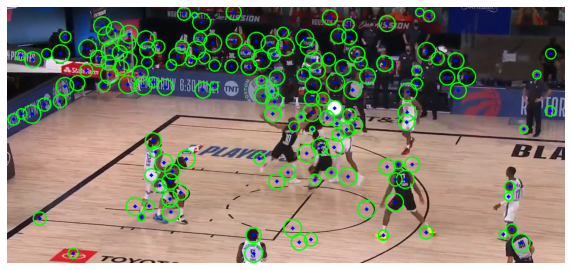

frame_00001.png
changed circle_coord:  [481 175  17]
changed min_dist:  83.74604283639066
changed circle_coord:  [284 155  16]
changed min_dist:  30.410171772536575
changed circle_coord:  [707 208  17]
changed min_dist:  29.11104711429708


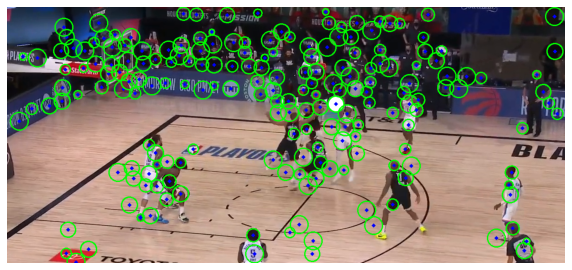

frame_00002.png
changed circle_coord:  [284 155  16]
changed min_dist:  31.461575854158077


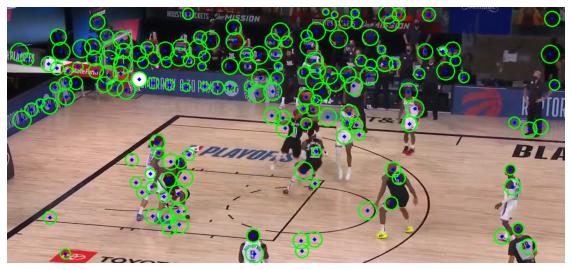

frame_00003.png
changed circle_coord:  [352 376  19]
changed min_dist:  141.72641589326287
changed circle_coord:  [257  82  19]
changed min_dist:  56.54069097261657
changed circle_coord:  [647 250  19]
changed min_dist:  53.77929018830522
changed circle_coord:  [295 160  14]
changed min_dist:  32.5144442464896
changed circle_coord:  [281 134  14]
changed min_dist:  24.611996374530705


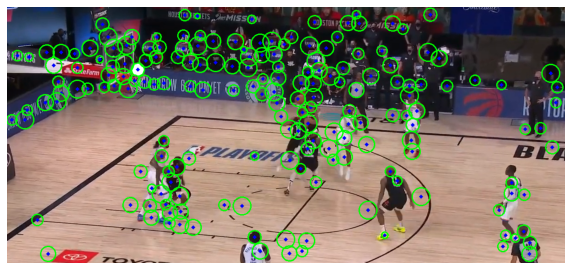

frame_00004.png
changed circle_coord:  [710 163  19]
changed min_dist:  100.847029767634
changed circle_coord:  [415  94  19]
changed min_dist:  70.12483375781301
changed circle_coord:  [259 127  19]
changed min_dist:  33.95429072649718
changed circle_coord:  [292 166  19]
changed min_dist:  32.36728382664106
changed circle_coord:  [283 133  16]
changed min_dist:  24.441151728381552


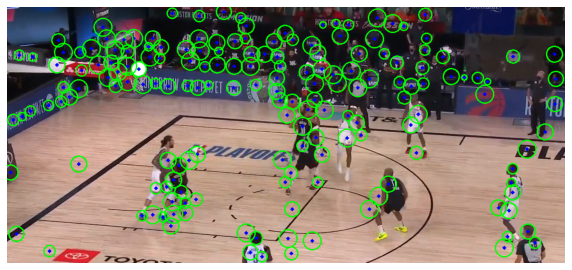

frame_00006.png
changed circle_coord:  [302 142  17]
changed min_dist:  28.80714283500378
changed circle_coord:  [298 118  19]
changed min_dist:  24.22142625124754


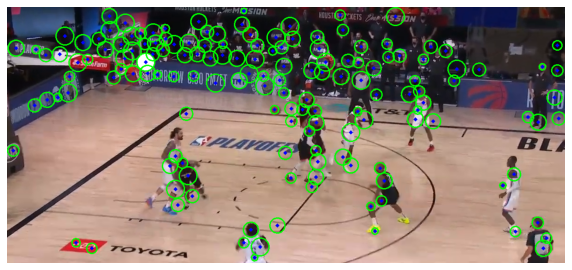

frame_00008.png
changed circle_coord:  [509 143  16]
changed min_dist:  84.96976632022388
changed circle_coord:  [454  70  19]
changed min_dist:  53.90494519507902
changed circle_coord:  [878 199  19]
changed min_dist:  51.46636809749363
changed circle_coord:  [326 127  16]
changed min_dist:  27.151940951050097
changed circle_coord:  [322 103  19]
changed min_dist:  25.10952692847227


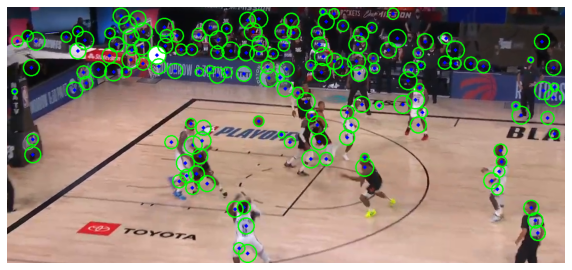

frame_00010.png
changed circle_coord:  [518 136  14]
changed min_dist:  85.06433914377097
changed circle_coord:  [484  83  19]
changed min_dist:  75.66213290946943
changed circle_coord:  [772 365  19]
changed min_dist:  47.33324089062507
changed circle_coord:  [344 128  17]
changed min_dist:  32.703151745674276
changed circle_coord:  [701 220  14]
changed min_dist:  30.54455322928536


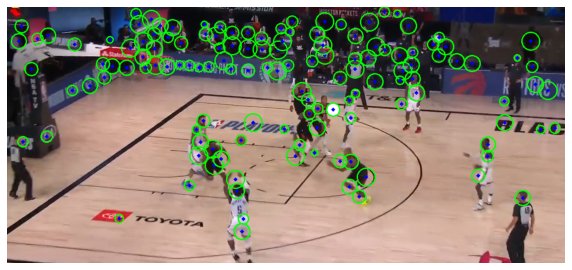

frame_00015.png
changed circle_coord:  [634 175  19]
changed min_dist:  53.01513830757574
changed circle_coord:  [365 128  16]
changed min_dist:  28.259293581452354


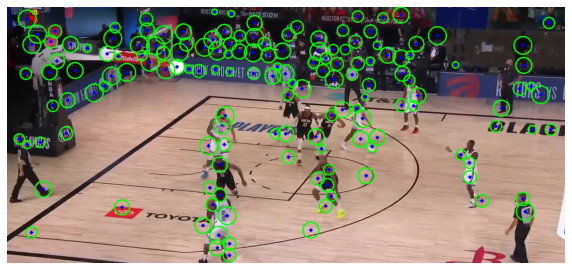

frame_00016.png
changed circle_coord:  [344 133  19]
changed min_dist:  51.084578802916546
changed circle_coord:  [337 109  19]
changed min_dist:  29.397816002628005
changed circle_coord:  [362 124  17]
changed min_dist:  28.407700619005


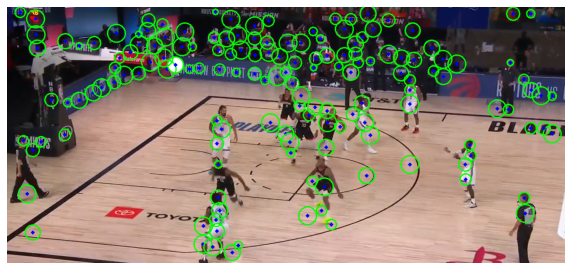

frame_00017.png
changed circle_coord:  [310 118  19]
changed min_dist:  41.4107617514282
changed circle_coord:  [341 103  19]
changed min_dist:  29.94248863281754
changed circle_coord:  [370 127  12]
changed min_dist:  26.86675337853638


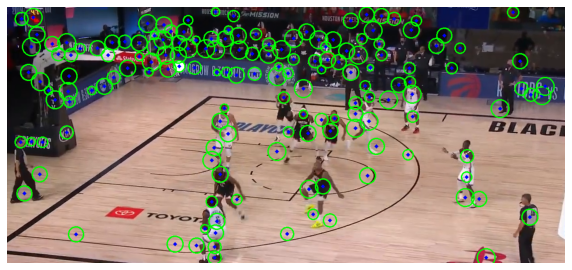

In [138]:
for f in files[:11]:
    fig = plt.figure(figsize=(10,10))
    print(f)
    img = cv.imread(DIR_PATH+f,0) # don't touch
    img = cv.medianBlur(img,5)
    
    bgr = cv.imread(DIR_PATH+f,1)
    cimg = cv.cvtColor(bgr,cv.COLOR_BGR2RGB)
    
    y,x = 0,0
    img = img[y:y+550,40:-40]
    cimg = cimg[y:y+550,40:-40]
    
    circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,dp=1.5,
                              minDist=20,param1=40,param2=28,minRadius=5,maxRadius=20)
    circles = np.uint16(np.around(circles))
    ball = find_closest_match(circles[0],DIR_PATH+f)
    cv.circle(cimg,(ball[0],ball[1]),ball[2],(255,255,255),-1)
    
    for i in circles[0,:]:
        cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
        cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
    plt.axis("off")
    plt.imshow(cimg)
    plt.show()



In [14]:
# CODE BELOW THIS IS FOR TESTING, IT IS NOT ORGANIZED 

In [99]:
# background subtraction on all [files], isolate out the players (hopefully) in a single view
backSub = cv.createBackgroundSubtractorMOG2()
# capture = cv.VideoCapture(cv.samples.findFileOrKeep(DIR_PATH))
# while(True):
#     ret,frame = capture.read()
#     if frame is None:
#         break

#     fgMask = backSub.apply(frame)
    
#     cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
#     cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
#                cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    
#     cv.imshow('Frame', frame)
#     cv.imshow('FG Mask', fgMask)
    
#     keyboard = cv.waitKey(30)
#     if keyboard == 'q' or keyboard == 27:
#         break

In [93]:
def test_find_closest_match(circle_coord,imgpath='../nba-3d-data/harden/view_0_alphapose/vis/frame_00008.png'):
    bgr_img = cv.imread(imgpath,1)
    true_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
    height,width,depth=true_img.shape 
    
    min_dist = float('inf')
    closest_circle = None

    circle_mask = np.zeros((height,width),np.uint8)
    cv.circle(circle_mask,(circle_coord[0],circle_coord[1]),circle_coord[2],1,-1)
    bgr_mean = cv.mean(true_img, mask=circle_mask)[::-1]
    return bgr_mean


    dist = ground_truth_distance(bgr_mean)
    if dist < min_dist: 
        closest_circle = circle_coord
        min_dist = dist
        print(dist)
        
    return closest_circle

# validate_ball_color([580,244,10],IMAGE_PATH)
    

circle_coord:  [580 244  10]
min_dist:  0.30120814756163533
[580 244  10]
(0.0, 53.09148264984227, 75.7602523659306, 119.84227129337539)


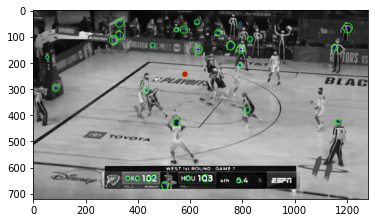

In [98]:
WORKING_IMAGE_PATH = '../nba-3d-data/harden/view_0_alphapose/vis/frame_00008.png'
REAL = [580,244,10]
FAKE = [794,150,15]

img = cv.imread(WORKING_IMAGE_PATH,0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=70,param2=20,minRadius=0,maxRadius=20)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
#         # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
t = [580,244,10]
cv.circle(cimg,(t[0],t[1]),t[2],(255,0,0),-1)

fake_best = find_closest_match(circles[0],WORKING_IMAGE_PATH)
print(fake_best)


best = test_find_closest_match(t)
print(best)





    
plt.imshow(cimg)
plt.show()

In [99]:
real_bgr = test_find_closest_match(REAL)
fake_bgr = test_find_closest_match(FAKE)
print(f'real bgr is {real_bgr}')
print(f'fake bgr is {fake_bgr}')
print(f'real distance is {ground_truth_distance(real_bgr)}')
print(f'fake distance is {ground_truth_distance(fake_bgr)}')


real bgr is (0.0, 53.09148264984227, 75.7602523659306, 119.84227129337539)
fake bgr is (0.0, 130.72355430183356, 131.60225669957686, 133.41607898448518)
real distance is 0.30120814756163533
fake distance is 96.50157003237645
